# Gradient Descent

In [67]:
import numpy as np
from numpy import linalg as LA
from sympy import *
import matplotlib.pyplot as plt
import numdifftools as nd
%matplotlib inline

## Part 1 - Implement Gradient Descent Algorithm

### Here is the implementation of the gradient descent algorithm:

In [68]:
def gradient_descent(tol, x0, a, f, Nmax):
    # Inputs
    # tol: tolerance of the algorithm, minimum value that must exist between x(k+1) and x(k) to stop iterating.
    # x0: initial condition, necessarily entered as a column vector.
    # a: alpha (magnitude of the steps)
    # f: function to which the algorithm is to be applied
    # Nmax: maximum number of iterations
    
    # k represents the current iteration.
    k = 0
    
    # dif is a parameter that will represent the distance between x(k+1) and x(k).
    dif = 1
    
    # If the function f is of dimension 2 or greater, the following code is applied:
    if isinstance(x0, (list, tuple, np.ndarray)):
        
        # A matrix is created where the current value of x(k) will be stored. The number of columns of A is the number
        # of variables of the vector x(k).
        A = np.zeros((1, np.shape(x0)[0]))
        
        # The first row of the matrix corresponds to the initial point.
        A[0, :] = x0.transpose()
        
        # The algorithm stops when the distance between x(k+1) and x(k) is less than the tolerance value entered by
        # parameter and when the maximum number of iterations has not yet been reached.
        while(k < Nmax and dif > tol):
            
            # The gradient of the function is calculated, evaluated at the current iteration. The result of this function is a
            # row vector that can be of any size greater than or equal to 2.
            gradient = nd.Gradient(f)(x0)
            
            # An auxiliary gradient is created but of column vector type, to be able to operate it with the initial condition.
            grad = np.zeros((np.size(gradient), 1))
            
            # The auxiliary gradient vector is filled with the values of the original gradient vector. This way,
            # the result of the gradient is already expressed as a column vector, as required to be able to
            # perform operations.
            for i in range(0, np.size(gradient)):
                grad[i] = gradient[i]
            
            # The formula of the gradient descent is applied.
            x = x0 - a * grad
            
            # x(k+1) is transposed to then be added to matrix A.
            xaux = x.transpose()
            A = np.append(A, xaux, axis=0)
            
            # The distance between x(k) and x(k+1) is calculated.
            dif = LA.norm(x - x0)
            
            # To move on to the next iteration.
            k += 1
            
            # The recently found value is assigned to the 'old' vector, as this is the one that should be used for the
            # next iteration.
            x0 = x
    
    # If the function f is of a single variable, the following code is applied:
    elif isinstance(x0, float) or isinstance(x0, int):
        
        # The algorithm stops when the distance between x(k+1) and x(k) is less than the tolerance value entered by
        # parameter and when the maximum number of iterations has not yet been reached.
        while(k < Nmax and dif > tol):
            
            # A matrix is created where the current value of x(k) will be stored.
            A = np.zeros((1, 1))
            
            # The value of the gradient is found.
            gradient = nd.Gradient(f)(x0)
            
            # The formula of the gradient descent is applied and the found value is added to matrix A.
            x = x0 - a * gradient
            A = np.append(A, x)
            
            # The distance between x(k) and x(k+1) is calculated.
            dif = LA.norm(x - x0)
            
            # To move on to the next iteration.
            k += 1
            
            # The recently found value is assigned to the 'old' vector, as this is the one that should be used for the 
            # next iteration.
            x0 = x
        
    # Outputs:
    # x: final result to which the algorithm converged when the stop condition was met, i.e., the minimum.
    # A: Matrix in which all the x(k) required to reach the minimum x are found.
        
    return x, A


## Part 2 - Trajectory of Gradient Descent

The gradient descent algorithm is applied to the function with different values of $\alpha$:

In [69]:
# Function definition
def f(x):
    Q = np.array([[1, 0], [0, 2]])
    B = np.array([[1/2], [0]])
    C = 5
    return (Q[0, 0]*x[0]**2 + (Q[0, 1] + Q[1, 0])*x[0]*x[1] + Q[1, 1]*x[1]**2 + B[0]*x[0] + B[1]*x[1] + C)[0]

# Definition of the different parameters needed by the algorithm
alpha = [0.1, 0.3, 0.8]
x0 = np.array([[2], [2]])
N = 100000
tol = 10**-6

# List to save the solutions found for each alpha
sols = []

# The algorithm is applied iteratively and the solution is added to the list
for a in alpha:
    xsol, solutions = gradient_descent(tol, x0, a, f, N)
    sols.append(xsol)
    
print(f'\nSolution with alpha = {alpha[0]}: \n {sols[0]}' )
print(f'\nSolution with alpha = {alpha[1]}: \n {sols[1]}' )
print(f'\nSolution with alpha = {alpha[2]}: \n {sols[2]}' )


Solution with alpha = 0.1: 
 [[-2.49996552e-01]
 [ 9.74508645e-14]]

Solution with alpha = 0.3: 
 [[-2.49999613e-01]
 [-2.62067225e-12]]

Solution with alpha = 0.8: 
 [[-2.49489061e-01]
 [-5.38687948e+15]]


As it can be seen, for $\alpha = 0.1$ and $\alpha = 0.3$, the gradient descent algorithm converges to almost identical values. However, when using $\alpha = 0.8$, the algorithm diverges to a value far from the actual minimum value of the function.


In [70]:
# Applying the algorithm again for the first two values of alpha, which are the ones that converge, in order to use these
# results when plotting.
x1, sol1 = gradient_descent(tol, x0, alpha[0], f, N)
x2, sol2 = gradient_descent(tol, x0, alpha[1], f, N)

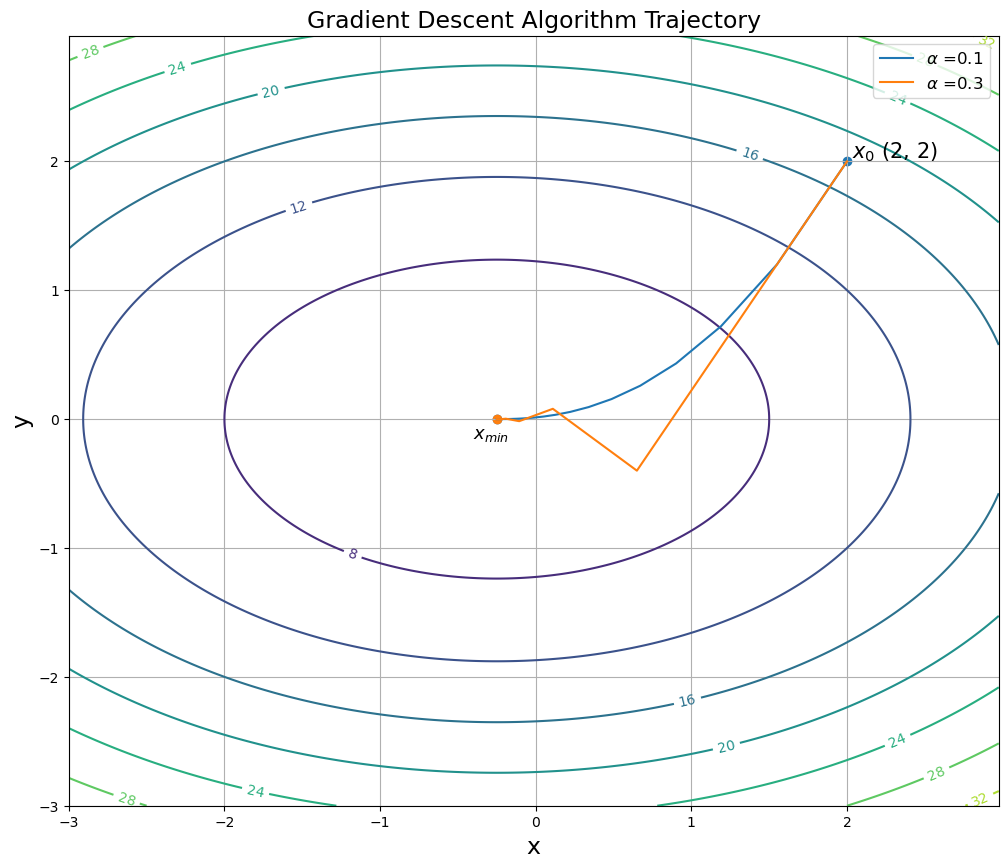

In [71]:
# Constructing the contour curves of the function f.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)

X, Y = np.meshgrid(x, y)
Z = X**2 + 2*Y**2 + (1/2)*X + 5

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Plotting the trajectories taken by the algorithm for each corresponding alpha.
plt.plot(sol1[:,0], sol1[:,1], label=r'$\alpha$ =' + f'{alpha[0]}')
plt.plot(sol2[:,0], sol2[:,1], label=r'$\alpha$ =' + f'{alpha[1]}')

plt.annotate("$x_0$ (2, 2)", x0+0.03, fontsize="15")
plt.annotate("$x_{min}$", x1-0.15, fontsize="13")

plt.scatter([x0[0], x1[0]], [x0[1], x1[1]])
plt.scatter(x2[0], x2[1])
plt.legend(fontsize="12")

ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Gradient Descent Algorithm Trajectory', fontsize="17")
ax.grid()
plt.show()


In the above graph, the trajectory for $\alpha = 0.8$ is not plotted because the final value obtained for this $\alpha$ is very large compared to the other two, and it would not allow the other results to be clearly observed.

It can be concluded that, as the value of the parameter $\alpha$ increases, the algorithm becomes more prone to divergence because larger steps are taken through the function, which may return values of $f(x_{min})$ that are greater than the previous value of $x_{min}$.

## Part 3 - Gradient Descent on $\gamma$ function

In [72]:
# Function is defined
def gamma(x):
    return (3*(1-x[0])**2)*np.exp(-x[0]**2-(x[1]+1)**2) - 10*(x[0]/5 - x[0]**3 - x[1]**5)*np.exp(-x[0]**2-x[1]**2) - (1/3)*np.exp(-(x[0]+1)**2-x[1]**2)

### a)
The gradient descent algorithm is applied for different initial points:

In [73]:
# Parameters declaration for entering the algorithm.
tol = 10**-6
a = 0.01
Nmax = 10000

# Declare all initial points as column vectors (as required by the algorithm).
x01 = np.array([[1.7],[-0.5]])
x02 = np.array([[-0.5],[-1.2]])
x03 = np.array([[-2],[-1]])
x04 = np.array([[1],[2]])
x05 = np.array([[2],[1]])

# Put all initial points into a list.
initial_points = [x01, x02, x03, x04, x05]

# Create an empty list to store the solutions for the function.
sols2 = []

# Apply the algorithm for each initial point.
for x in initial_points:
    xsol2, solutions2 = gradient_descent(tol, x, a, gamma, Nmax)
    sols2.append(xsol2)

for i in range(0,len(initial_points)):
    print(f'\nSolution with \n x0 = \n {initial_points[i]}: \n \n {sols2[i]}')



Solution with 
 x0 = 
 [[ 1.7]
 [-0.5]]: 
 
 [[ 3.50543959]
 [-1.48108127]]

Solution with 
 x0 = 
 [[-0.5]
 [-1.2]]: 
 
 [[ 0.22827481]
 [-1.62553638]]

Solution with 
 x0 = 
 [[-2]
 [-1]]: 
 
 [[-1.34739965]
 [ 0.20450967]]

Solution with 
 x0 = 
 [[1]
 [2]]: 
 
 [[2.33655707]
 [3.36736098]]

Solution with 
 x0 = 
 [[2]
 [1]]: 
 
 [[3.43806788]
 [1.65447625]]


In [74]:
# The algorithm is applied for the different initial points
xmin1, A1 = gradient_descent(tol, x01, a, gamma, Nmax)
xmin2, A2 = gradient_descent(tol, x02, a, gamma, Nmax)
xmin3, A3 = gradient_descent(tol, x03, a, gamma, Nmax)
xmin4, A4 = gradient_descent(tol, x04, a, gamma, Nmax)
xmin5, A5 = gradient_descent(tol, x05, a, gamma, Nmax)

With $x_{01} = (1.7, -0.5)$

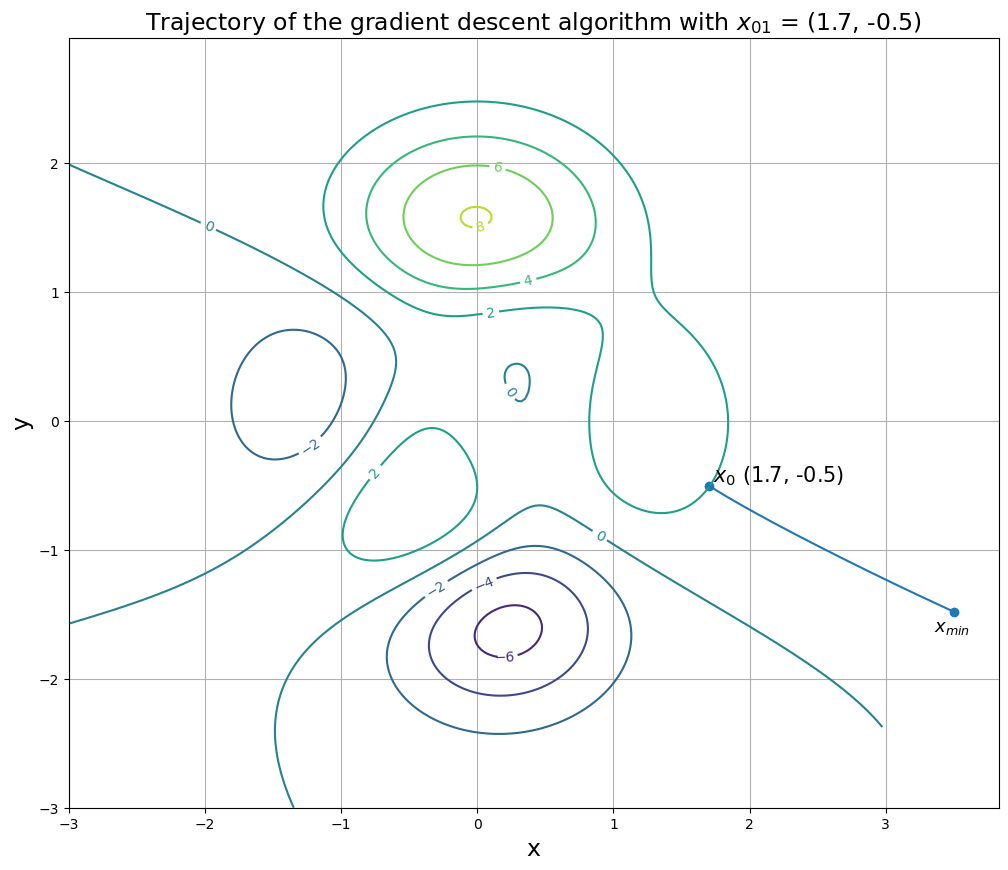

In [75]:
# Construct contour curves of the gamma function.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Plot the trajectory taken by the algorithm for the corresponding initial point.
plt.plot(A1[:,0], A1[:,1], label = r'$x_0$ =' + "(1.7, -0.5)")

plt.annotate("$x_0$ (1.7, -0.5)", x01+0.03, fontsize="15")
plt.annotate("$x_{min}$", xmin1-0.15, fontsize="13")

plt.scatter([x01[0], xmin1[0]], [x01[1], xmin1[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trajectory of the gradient descent algorithm with $x_{01}$ = (1.7, -0.5)', fontsize="17")
ax.grid()
plt.show()

With $x_{02} = (-0.5, -1.2)$:

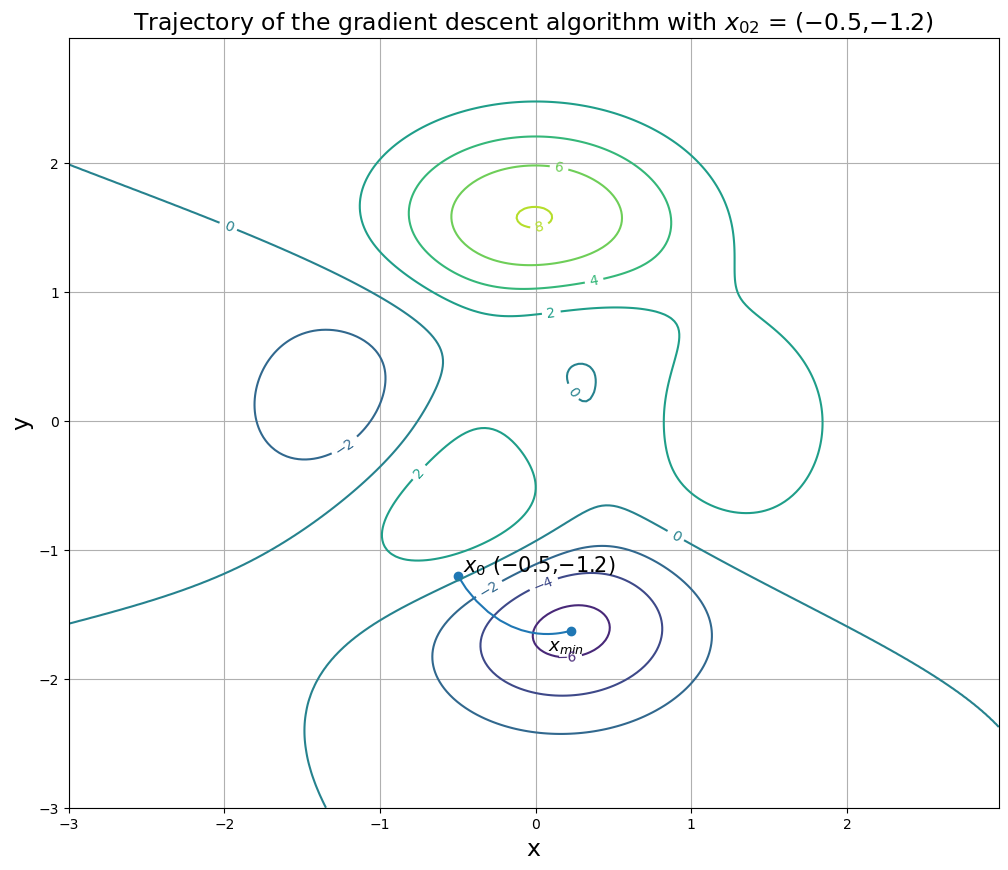

In [76]:
# Construct contour curves of the gamma function.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Plot the trajectory taken by the algorithm for the corresponding initial point.
plt.plot(A2[:,0], A2[:,1], label = r'$x_0$ =' + "(−0.5,−1.2)")

plt.annotate("$x_0$ (−0.5,−1.2)", x02+0.03, fontsize="15")
plt.annotate("$x_{min}$", xmin2-0.15, fontsize="13")

plt.scatter([x02[0], xmin2[0]], [x02[1], xmin2[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trajectory of the gradient descent algorithm with $x_{02}$ = (−0.5,−1.2)', fontsize="17")
ax.grid()
plt.show()

With $x_{03} = (-2, -1)$:

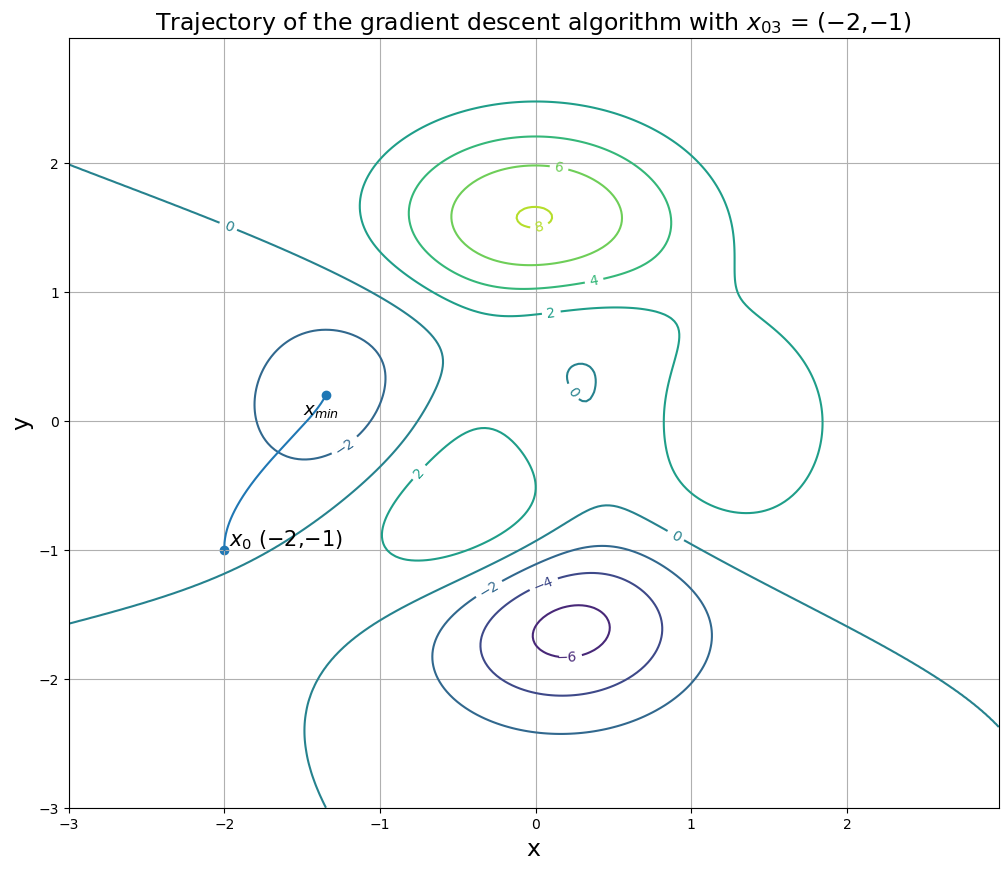

In [77]:
# Construct contour curves of the gamma function.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Plot the trajectory taken by the algorithm for the corresponding initial point.
plt.plot(A3[:,0], A3[:,1], label = r'$x_0$ =' + "(−2,−1)")

plt.annotate("$x_0$ (−2,−1) ", x03+0.03, fontsize="15")
plt.annotate("$x_{min}$", xmin3-0.15, fontsize="13")

plt.scatter([x03[0], xmin3[0]], [x03[1], xmin3[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trajectory of the gradient descent algorithm with $x_{03}$ = (−2,−1)', fontsize="17")
ax.grid()
plt.show()

With $x_{04} =  (1 , 2)$:

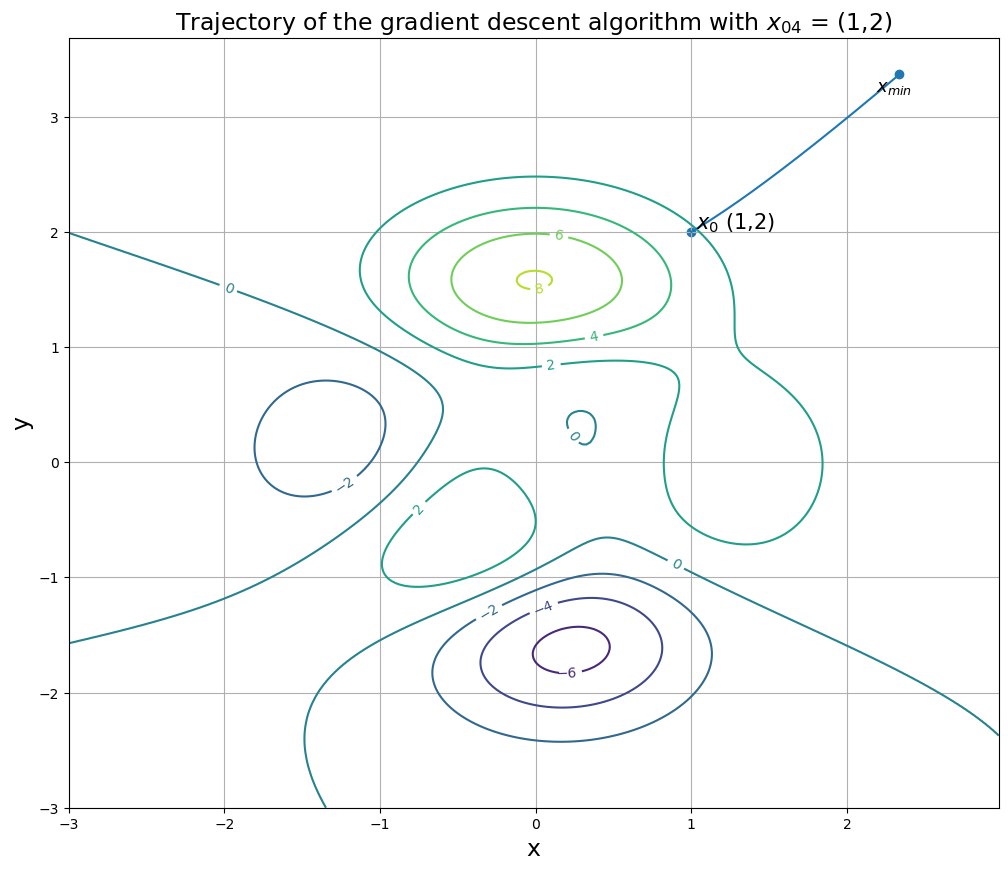

In [78]:
# Construct contour curves of the gamma function.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Plot the trajectory taken by the algorithm for the corresponding initial point.
plt.plot(A4[:,0], A4[:,1], label = r'$x_0$ =' + "(1,2)")

plt.annotate("$x_0$ (1,2)", x04+0.03, fontsize="15")
plt.annotate("$x_{min}$", xmin4-0.15, fontsize="13")

plt.scatter([x04[0], xmin4[0]], [x04[1], xmin4[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trajectory of the gradient descent algorithm with $x_{04}$ = (1,2)', fontsize="17")
ax.grid()
plt.show()

With $x_{05} =  (2 , 1)$:

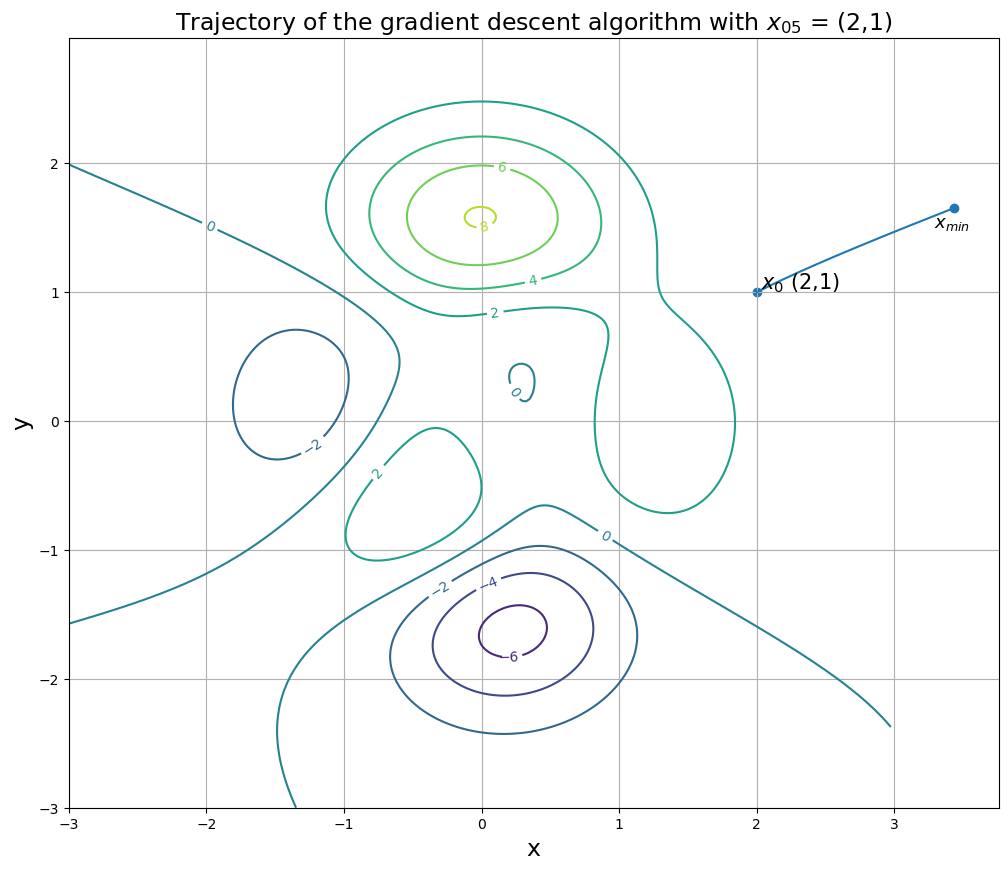

In [79]:
# Construct contour curves of the gamma function.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Plot the trajectory taken by the algorithm for the corresponding initial point.
plt.plot(A5[:,0], A5[:,1], label = r'$x_0$ =' + "(2,1)")

plt.annotate("$x_0$ (2,1)", x05+0.03, fontsize="15")
plt.annotate("$x_{min}$", xmin5-0.15, fontsize="13")

plt.scatter([x05[0], xmin5[0]], [x05[1], xmin5[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trajectory of the gradient descent algorithm with $x_{05}$ = (2,1)', fontsize="17")
ax.grid()
plt.show()

### b) Approximated gradient descent

Suppose that, hypothetically, it is difficult to generate a function for the gradient of the $\gamma$ function, or that the analytical form of the function is unknown. Estimate the gradient using the following approximation for $x \in \mathbb{R}^n$:

$$\frac{\partial f}{\partial x_i}f(x) = \lim_{h\to0} \frac{f(d_i + x) - f(x)}{h}$$

with $d_i \in \mathbb{R}^n$ such that

$$d_i = (d_{i1}, d_{i2}, ..., d_{in}) \hspace{30px} d_{ij} = 
                                                              \begin{cases}
                                                                \text{h} & \quad\text{if}\quad i = j\\
                                                                \text{0} & \quad\text{if}\quad i \neq j \\
                                                              \end{cases}$$

In [80]:
def gradient_descent_approx(tol, x0, a, f, Nmax):
    # Inputs
    # tol: tolerance of the algorithm, minimum value that must exist between x(k+1) and x(k) to stop iterating.
    # x0: initial condition, must be entered as a column vector.
    # a: alpha (magnitude of the steps)
    # f: function to which the algorithm is to be applied
    # Nmax: maximum number of iterations
    
    # Approximation to calculate the gradient.
    h = 0.01
    
    # k represents the current iteration.
    k = 0
    
    # dif is a parameter that will represent the distance between x(k+1) and x(k).
    dif = 1
    
    # If the function f is of dimension 2 or higher, the following code is applied:
    if isinstance(x0, (list, tuple, np.ndarray)):
        
        # Each vector 'di' is defined in a matrix.
        d = h*np.identity(np.shape(x0)[0])
        
        # A matrix is created to store the current value of x(k). The number of columns of A is the number
        # of variables of the vector x(k).
        A = np.zeros((1,np.shape(x0)[0]))
        
        # The first row of the matrix corresponds to the initial point.
        A[0,:] = x0.transpose()
        
        # The algorithm stops when the distance between x(k+1) and x(k) is less than the tolerance value that enters
        # by parameter and when the maximum number of iterations has not yet been reached.
        while(k < Nmax and dif > tol):
            
            # The gradient of the function, evaluated at the current iteration, is calculated. We start by creating the
            # gradient vector.
            gradiente = np.zeros((1, np.shape(x0)[0]))
            grad = np.zeros((np.shape(x0)[0],1))

            for i in range(0, np.shape(gradiente)[1]):
                # It is converted into a column vector.
                grad[i] = gradiente[:,i]
                # The i-th row of the d matrix is also converted into a column vector, in order to operate them.
                dcol = np.reshape(d[i], (-1, 1))
                # The gradient is calculated taking into account the approximation.
                grad[i] = (f(x0 + dcol) - f(x0))/h
            
            # The formula of the gradient descent is applied.
            x = x0 - a*grad
            
            # The x(k+1) is transposed and then added to the A matrix.
            xaux = x.transpose()
            A = np.append(A, xaux, axis=0)
            
            # The distance between x(k) and x(k+1) is calculated.
            dif = LA.norm(x-x0)
            
            # To move on to the next iteration.
            k+=1
            
            # The 'old' vector is assigned the recently found value, because this is the one that must be used for the 
            # next iteration.
            x0 = x
    
    # If the function f is of a single variable, the following code is applied:
    elif isinstance(x0, float) or isinstance(x0, int):
        
        # The algorithm stops when the distance between x(k+1) and x(k) is less than the tolerance value that enters
        # by parameter and when the maximum number of iterations has not yet been reached.
        while(k < Nmax and dif > tol):
            
            # A matrix is created to store the current value of x(k).
            A = np.zeros((1,1))
            
            # The value of the gradient is found using the approximation, knowing that in this case, d = h.
            gradiente = (f(x0+h) - f(x0))/h
            
            # The formula of the gradient descent is applied and the found value is added to the A matrix.
            x = x0 - a*gradiente
            A = np.append(A, x)
            
            # The distance between x(k) and x(k+1) is calculated.
            dif = LA.norm(x-x0)
            
            # To move on to the next iteration.
            k+=1
            
            # The 'old' vector is assigned the recently found value, because this is the one that must be used for the 
            # next iteration.
            x0 = x
        
    # Outputs:
    # x: final result to which the algorithm converged when the stopping condition was met, i.e., the minimum.
    # A: Matrix in which all the x(k) required to reach the minimum x are found.
        
    return x, A

Se procede a aplicar el algoritmo con el cálculo aproximado del gradiente a los mismos puntos iniciales del punto 3.

In [81]:
# Parameters
a = 0.01
tol = 10**-6
Nmax = 10000

# The algorithm is applied for the different initial points
xmin_aprox1, A1_aprox = gradient_descent_approx(tol, x01, a, gamma, Nmax)
xmin_aprox2, A2_aprox = gradient_descent_approx(tol, x02, a, gamma, Nmax)
xmin_aprox3, A3_aprox = gradient_descent_approx(tol, x03, a, gamma, Nmax)
xmin_aprox4, A4_aprox = gradient_descent_approx(tol, x04, a, gamma, Nmax)
xmin_aprox5, A5_aprox = gradient_descent_approx(tol, x05, a, gamma, Nmax)

With $x_{01} = (1.7, -0.5)$

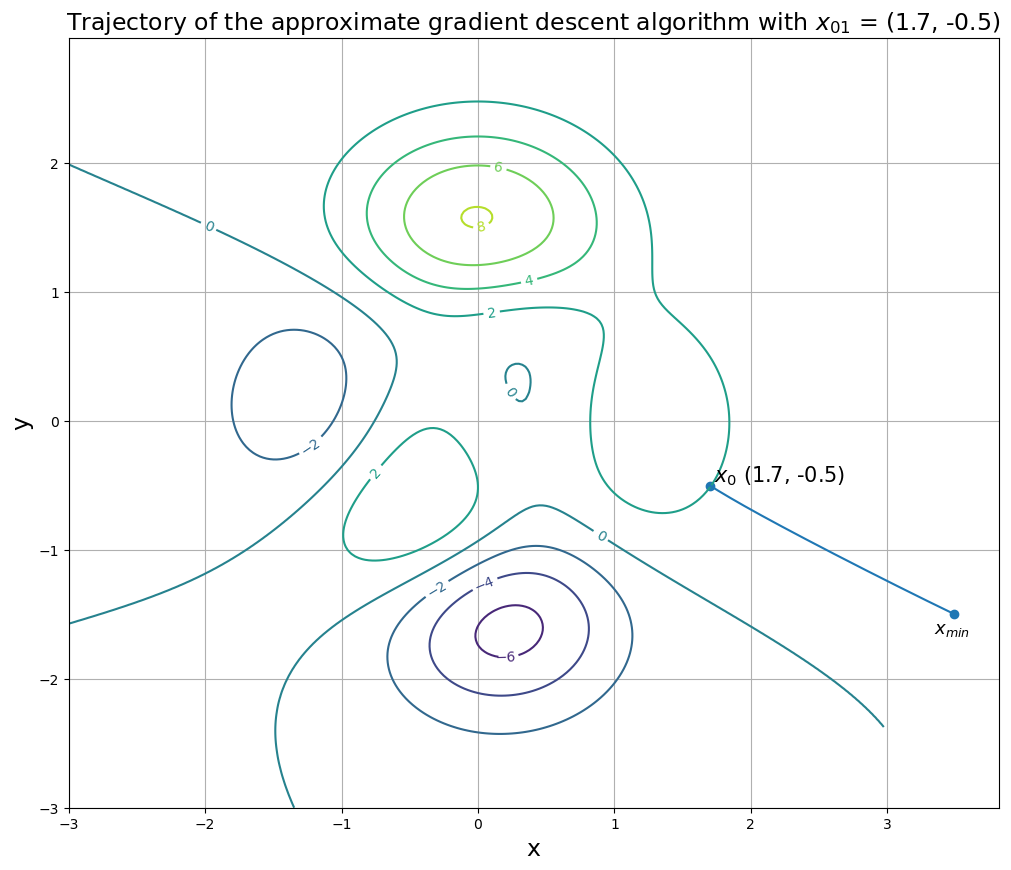

In [82]:
# Construct contour curves of the gamma function.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Plot the trajectory taken by the algorithm for the corresponding initial point.
plt.plot(A1_aprox[:,0], A1_aprox[:,1], label = r'$x_0$ =' + "(1.7, -0.5)")

plt.annotate("$x_0$ (1.7, -0.5)", x01+0.03, fontsize="15")
plt.annotate("$x_{min}$", xmin_aprox1-0.15, fontsize="13")

plt.scatter([x01[0], xmin_aprox1[0]], [x01[1], xmin_aprox1[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trajectory of the approximate gradient descent algorithm with $x_{01}$ = (1.7, -0.5)', fontsize="17")
ax.grid()
plt.show()


With $x_{02} = (-0.5, -1.2)$

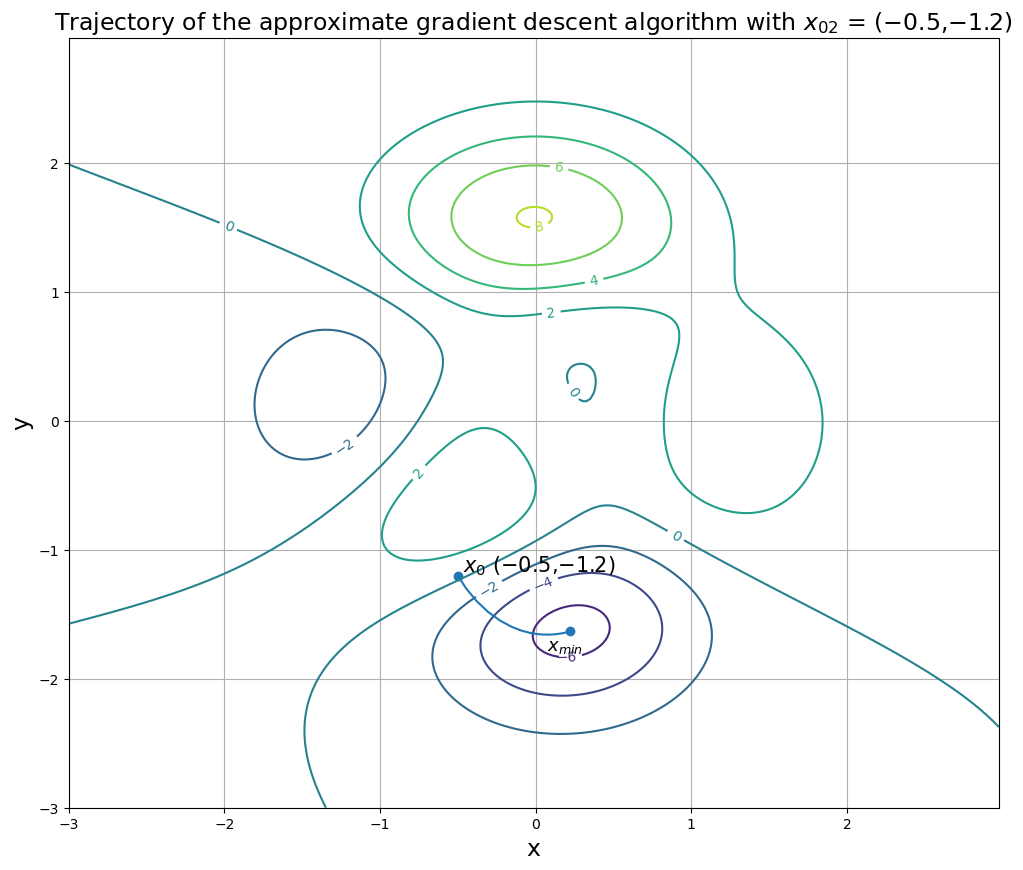

In [83]:
# Construct contour curves of the gamma function.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Plot the trajectory taken by the algorithm for the corresponding initial point.
plt.plot(A2_aprox[:,0], A2_aprox[:,1], label = r'$x_0$ =' + "(−0.5,−1.2)")

plt.annotate("$x_0$ (−0.5,−1.2)", x02+0.03, fontsize="15")
plt.annotate("$x_{min}$", xmin_aprox2-0.15, fontsize="13")

plt.scatter([x02[0], xmin_aprox2[0]], [x02[1], xmin_aprox2[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trajectory of the approximate gradient descent algorithm with $x_{02}$ = (−0.5,−1.2)', fontsize="17")
ax.grid()
plt.show()


With $x_{03} = (-2 , -1)$

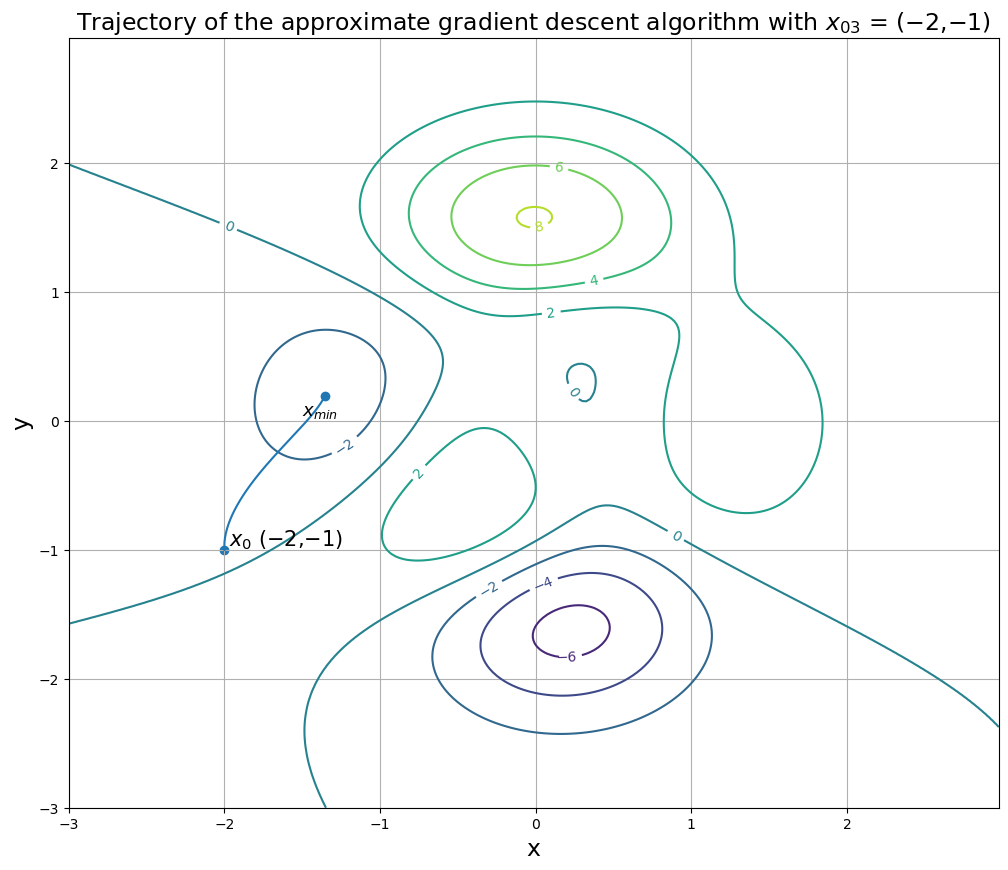

In [84]:
# Construct contour curves of the gamma function.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Plot the trajectory taken by the algorithm for the corresponding initial point.
plt.plot(A3_aprox[:,0], A3_aprox[:,1], label = r'$x_0$ =' + "(−2,−1)")

plt.annotate("$x_0$ (−2,−1)", x03+0.03, fontsize="15")
plt.annotate("$x_{min}$", xmin_aprox3-0.15, fontsize="13")

plt.scatter([x03[0], xmin_aprox3[0]], [x03[1], xmin_aprox3[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trajectory of the approximate gradient descent algorithm with $x_{03}$ = (−2,−1)', fontsize="17")
ax.grid()
plt.show()


With $x_{04} = (1 , 2)$

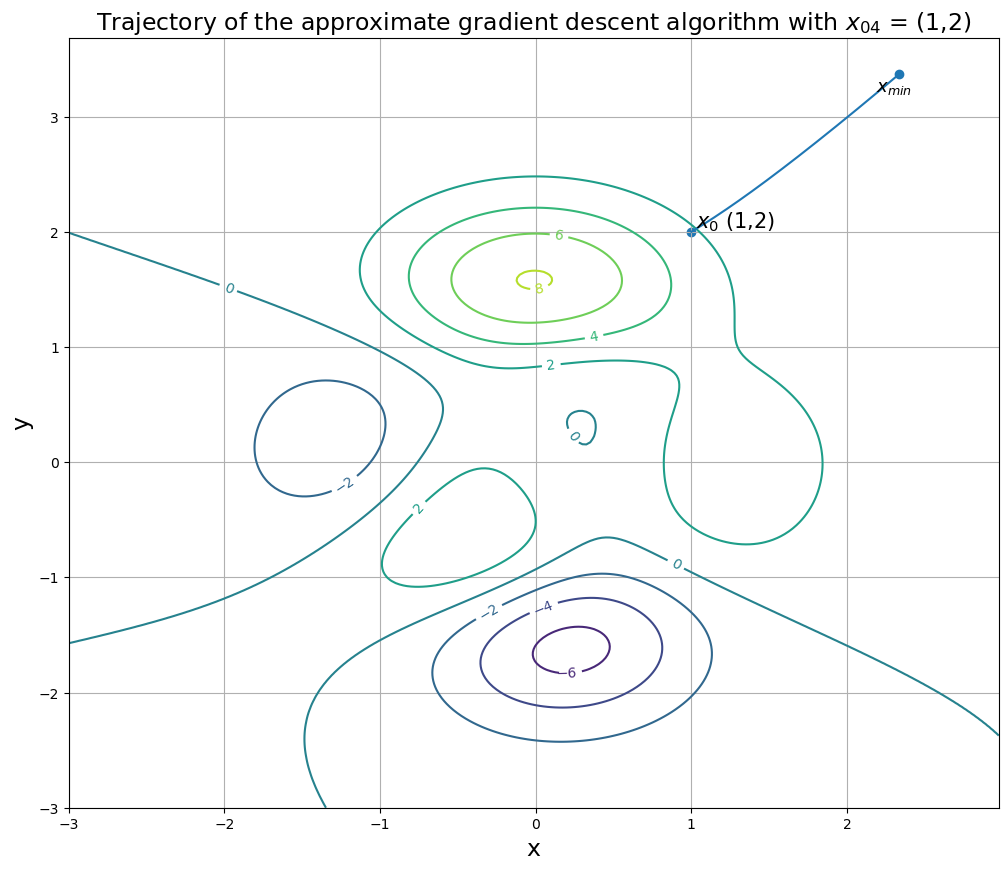

In [85]:
# Construct contour curves of the gamma function.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Plot the trajectory taken by the algorithm for the corresponding initial point.
plt.plot(A4_aprox[:,0], A4_aprox[:,1], label = r'$x_0$ =' + "(1,2)")

plt.annotate("$x_0$ (1,2)", x04+0.03, fontsize="15")
plt.annotate("$x_{min}$", xmin_aprox4-0.15, fontsize="13")

plt.scatter([x04[0], xmin_aprox4[0]], [x04[1], xmin_aprox4[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trajectory of the approximate gradient descent algorithm with $x_{04}$ = (1,2)', fontsize="17")
ax.grid()
plt.show()


With $x_{05} =  (2 , 1)$

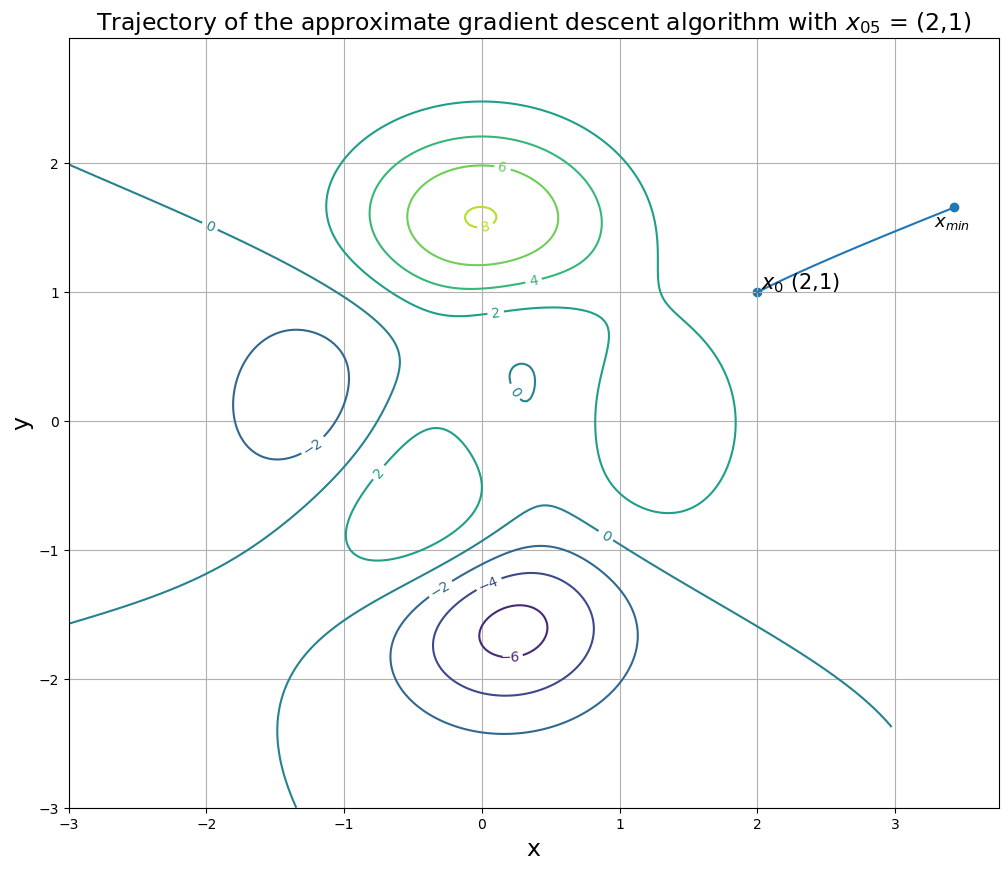

In [86]:
# Construct contour curves of the gamma function.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Plot the trajectory taken by the algorithm for the corresponding initial point.
plt.plot(A5_aprox[:,0], A5_aprox[:,1], label = r'$x_0$ =' + "(2,1)")

plt.annotate("$x_0$ (2,1)", x05+0.03, fontsize="15")
plt.annotate("$x_{min}$", xmin_aprox5-0.15, fontsize="13")

plt.scatter([x05[0], xmin_aprox5[0]], [x05[1], xmin_aprox5[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trajectory of the approximate gradient descent algorithm with $x_{05}$ = (2,1)', fontsize="17")
ax.grid()


plt.show()

As can be noticed, the results using the method with approximate gradient calculation are very close to the results using the method with exact gradient calculation.


### c)

The initial point influences the convergence of the gradient descent method because not all initial points are close to a minimum of the objective function. This means that if a very distant initial point from a local minimum of the function is chosen, the algorithm may take steps that move away from the actual local minimum.

If an initial point close to a local minimum is chosen, the algorithm will converge to this point, as all possible steps will be in the direction of this minimum. However, if a point far from a local minimum is chosen, the algorithm will diverge because a step may be taken in one direction in iteration $i$, but in the next iteration, the step may be taken in a completely different direction, and if this continues, a local minimum of the function will never be reached.


## Part 4 - Convergence

The region $D \subseteq \mathbb{R}^2$ is defined as

$D = \{x = [x_1, x_2]^T \in \mathbb{R}^2 | -6.531 \leq \gamma(x_1, x_2) \leq -2 \}$

For a constant $\alpha$ equal to 0.01, it can be asserted that there exists a region such that every $x_0 \in D$ guarantees the convergence of the gradient descent algorithm to the global minimum of the function $\gamma$ because in this region, the function $\gamma$ is convex and at any point in this region, the gradient will be pointing outward, which means that the gradient descent algorithm will always lead the function in the opposite direction, eventually reaching the global minimum of the function, where it has a value of $\gamma(x,y) = -6.531$, as demonstrated in the following cell:


In [87]:
float(gamma(np.array([[0.2],[-1.6]])))

-6.5310074245704035

Below is a 2-dimensional plot of the region $D$. In general, all points within the region $D$ are those that lie within the contour $\gamma(x,y) = 2$, and it would be bounded up to the contour $\gamma(x,y) = -6.531$, which is where the global minimum of the function is located.

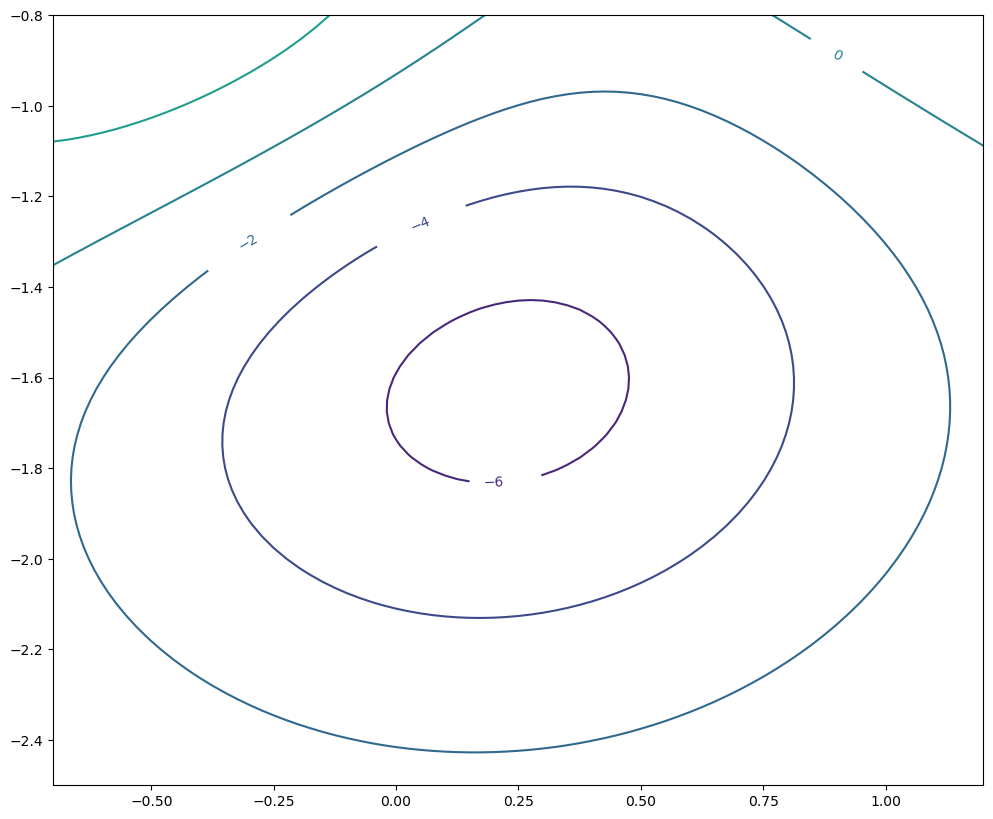

In [88]:
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

plt.xlim(-0.7, 1.2)
plt.ylim(-2.5, -0.8)
plt.show()